<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/forecast_Favorita_Grocery_2_2_5_no_tsfresh_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install skforecast
!pip install xgboost
!pip install lightgbm
!pip install nolds
!pip install pmdarima
!pip install feature-engine
!pip install shap
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filtered_grouped_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/zvezda/MIO_1/Corporación Favorita Grocery Sales Forecasting/Favorita_Grocery_df.xlsx',
                  index_col=[0])

In [ ]:
def static_stacionar(data, SKU):
    import matplotlib.pyplot as plt

    random.seed(1)
    np.random.seed(1)

    end_train = '2016-06-01 23:59:59'
    end_valid = '2017-01-01 23:59:59'





    # Добавление прогноза на график
    plt.figure(figsize=(22, 6))
    plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
    plt.plot(data.index[(data.index <= end_valid) & (data.index >= end_train)], data[end_train:end_valid],label='Valid данные')
    plt.plot(data.index[data.index >= end_valid], data[end_valid:],label='Test данные')
    # Добавление точки на график

    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.title(f'График временного ряда с прогнозом forecaster SKU: {SKU}')
    plt.legend()
    plt.grid(True)
    plt.show()
    # diferenciator = TimeSeriesDifferentiator(order=1)
    # data_diff = diferenciator.fit_transform(data)
    # data_diff = pd.Series(data_diff, index=data.index).dropna()
    # data_diff

    print()
    stl = STL(data, seasonal=13)
    result = stl.fit()

    fig, axes = plt.subplots(4, 1, sharex=False)
    fig.suptitle(f' SKU: {SKU} STL Decomposition', fontsize=16)
    fig.set_size_inches(22, 12)

    # График исходных данных
    axes[0].plot(result.observed)
    axes[0].set_title('Observed')
    axes[0].grid(True)

    # График тренда
    axes[1].plot(result.trend)
    axes[1].set_title('Trend')
    axes[1].grid(True)

    # График сезонности
    axes[2].plot(result.seasonal)
    axes[2].set_title('Seasonality')
    axes[2].grid(True)

    # График остатка
    axes[3].plot(result.resid)
    axes[3].set_title('Residuals')
    axes[3].grid(True)

    # Добавляем пространство между графиками
    plt.subplots_adjust(hspace=0.5)

    # Показываем графики
    plt.show()
    # ===================================


    print()

    #=======================================

    # acf_values_1 = acf(data)

    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика автокорреляционной функции с указанием подграфика для отображения
    plot_acf(data, lags=47, ax=ax)

    # Отображение графика
    plt.show()
    print()


    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика функции частичной автокорреляции с указанием подграфика для отображения
    from statsmodels.graphics.tsaplots import plot_pacf
    plot_pacf(data, lags=47, ax=ax)

    # Отображение графика
    plt.show()

    print()
    import nolds
    from scipy.stats import entropy
    from scipy.fft import fft
    from statsmodels.stats.diagnostic import acorr_ljungbox
    from statsmodels.tsa.stattools import adfuller


    from statsmodels.tsa.stattools import kpss


    coef_hurst = nolds.hurst_rs(data)




    # Применение быстрого преобразования Фурье (FFT) к временному ряду
    fft_result = fft(data.values.tolist())
    # Вычисление амплитудного спектра
    amplitude_spectrum = np.abs(fft_result)
    # Нормализация амплитудного спектра
    normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
    # Вычисление спектральной энтропии
    feat_spectral = entropy(normalized_spectrum,base=len(data))


    box_pierce = acorr_ljungbox(data,boxpierce=True)
    ljung_box = acorr_ljungbox(data)
    #=============================
    kpss_stat,p_value, lags,crit = kpss(data,regression = 'ct')



    #=============================

    adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(data)




    # sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
    # plt.show()

    unitroot_kpss = kpss(data,regression = 'ct')

    shift_level_index= data.rolling(window=10).mean().idxmax()
    print()
    print(f'SKU: {SKU} CТАТИСТИКА ОСНОВАНАЯ НА R')
    print()
    print('coef_hurst коэффициент Херста',coef_hurst)
    if coef_hurst < 0.5:
        print("Ряд имеет антипериодическую зависимость (значения в противоположных направлениях)")
    elif coef_hurst == 0.5:
        print("Ряд не имеет зависимости")
    else:
        print("Ряд имеет периодическую зависимость (значения в одном направлении)")
    print()
    print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
    print()
    print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
    print()
    print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
    print()
    print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
    print()
    print('____________________________________')
    print()
    print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n')
    print()
    # check p-value against significance level
    if p_value < 0.05:
        print('I По p-value, ряд НЕ стационарен метод KPSS')
    else:
        print('I По p-value, ряд стационарен метод KPSS')

    # check KPSS statistic against critical value

    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)
    # print('resstore', resstore)
    print()
    print('Дики — Фуллера проверки на стационарность , \n')
    print('kpss_stat', adf)
    print('pvalue', pvalue)
    print('usedlag', usedlag)
    print('nobs', nobs)
    print('critical_values', critical_values)

    print('Results of Dickey-Fuller Test:')

    if pvalue <= 0.05:
        print('I По p-value, ряд стационарен метод ADF')
    else:
        print('I По p-value, ряд НЕ стационарен метод ADF')

    # check ADF statistic against critical value
    if abs(adf) > abs(max(critical_values.values())):
        print('II По значению ADF статистики, ряд стационарен, метод ADF' )
    else:
        print('II По значению ADF статистики, ряд НЕ стационарен, метод ADF')
    # print('resstore', resstore)

    print()



In [ ]:
import numpy as np
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller


def static_resid(residuals,y_pred,SKU,model,name_regress):

    # Работа с остатками после обученя модели

    # График остатков
    plt.subplots(figsize=(22, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title(f'SKU_{SKU}_{model}_{name_regress} График остатков')
    plt.show()
    print()

    # Q-Q график
    plt.subplots(figsize=(22, 6))
    stats.probplot(residuals, dist='norm', plot=plt)
    plt.title(f'SKU_{SKU}_{model}_{name_regress} Q-Q график остатков')
    plt.show()
    print()
    # Диаграмма распределения остатков
    plt.figure(figsize=(22, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Остатки')
    plt.ylabel('Частота')
    plt.title(f'SKU_{SKU}_{model}_{name_regress} Диаграмма распределения остатков')
    plt.show()
    print()

    # Визуализация ACF остатков
    fig, ax = plt.subplots(figsize=(22, 6))
    # Построение графика автокорреляционной функции с указанием подграфика для отображения
    plot_acf(residuals, lags=10, ax=ax)
    # Отображение графика
    plt.show()
    print()

    # Визуализация PACF остатков
    fig, ax = plt.subplots(figsize=(22, 6))
    plot_pacf(residuals, lags=10, ax=ax)
    # Отображение графика
    plt.show()
    print()

    print(f"Статисткика по остаткам SKU_{SKU}_{model}_{name_regress}")
    # Применение теста Шапиро-Уилка к остаткам
    shapiro_test = stats.shapiro(residuals)

    # Проверка условия и вывод сообщения
    if shapiro_test.pvalue >= 0.05:
        print('Остатки временного ряда распределены согласно нормальному закону')
    else:
        print('Остатки временного ряда НЕ распределены согласно нормальному закону')
    # Вывод результатов
    print('Статистика теста Шапиро-Уилка :', shapiro_test.statistic)
    print('p-value Шапиро-Уилка :', shapiro_test.pvalue)
    print()
    print('Тест Бокса-Пирса (BP) и Льюнга-Бокса (LB) на определение шума в остатках')
    box_pierce = acorr_ljungbox(residuals,boxpierce=True)
    box_pierce['result'] = box_pierce.apply(lambda row: 'белый шум' if row['lb_pvalue'] >= 0.05 and row['bp_pvalue'] >= 0.05 else 'не белый шум', axis=1)
    print(box_pierce)
    # Тест Дарбина-Уотсона
    print()
    dw_test = sm.stats.stattools.durbin_watson(residuals)
    print('Тест Дарбина-Уотсона:', dw_test)
    if dw_test < 1.0:
        print("Положительная автокорреляция первого порядка в остатках.")
    elif dw_test > 3.0:
        print("Отрицательная автокорреляция первого порядка в остатках.")
    else:
        print("Отсутствие автокорреляции первого порядка в остатках.")

    print()

    print('Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)')
    #KPSS
    kpss_stat,p_value, lags,crit = kpss(residuals,regression = 'ct')
    # check p-value against significance level
    if p_value < 0.05:
        print('I По p-value, ряд НЕ стационарен метод KPSS')
    else:
        print('I По p-value, ряд стационарен метод KPSS')

    # check KPSS statistic against critical value

    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)



    print()
    print('Тест на стационарность Дики-Фуллера (Dickey-Fuller test')
    adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(residuals)
    print()
    print('Дики — Фуллера проверки на стационарность , \n')
    print('kpss_stat', adf)
    print('pvalue', pvalue)
    print('usedlag', usedlag)
    print('nobs', nobs)
    print('critical_values', critical_values)

    print('Results of Dickey-Fuller Test:')

    if pvalue <= 0.05:
        print('I По p-value, ряд стационарен метод ADF')
    else:
        print('I По p-value, ряд НЕ стационарен метод ADF')

    # check ADF statistic against critical value
    if abs(adf) > abs(max(critical_values.values())):
        print('II По значению ADF статистики, ряд стационарен, метод ADF' )
    else:
        print('II По значению ADF статистики, ряд НЕ стационарен, метод ADF')
    # print('resstore', resstore)

    print()



In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

from pmdarima.arima.utils import nsdiffs
from pmdarima.arima.utils import ndiffs
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
import shap
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from pandas.tseries.offsets import DateOffset

import random
res_df = None


def func_model(data, SKU):


    random.seed(1)
    np.random.seed(1)

    end_train = '2016-06-01 23:59:59'
    end_valid = '2017-01-01 23:59:59'




    # Добавление прогноза на график
    plt.figure(figsize=(22, 6))
    plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
    plt.plot(data.index[(data.index <= end_valid) & (data.index >= end_train)], data[end_train:end_valid],label='Valid данные')
    plt.plot(data.index[data.index >= end_valid], data[end_valid:],label='Test данные')
    # Добавление точки на график
    # plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
    # plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.title(f'График временного ряда с прогнозом forecaster SKU: {SKU}')
    plt.legend()
    plt.grid(True)
    plt.show()
    # diferenciator = TimeSeriesDifferentiator(order=1)
    # data_diff = diferenciator.fit_transform(data)
    # data_diff = pd.Series(data_diff, index=data.index).dropna()
    # data_diff


    kpss_stat,p_value, lags,crit = kpss(data,regression = 'ct')
    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)

    n_diffs = ndiffs(data, test='kpss')

    print("ndiffs нужно ли делать дифференцацию:", n_diffs)


    # Определение количества сезонных разностей
    n_seasonal_diffs = nsdiffs(data,m=4)

    print("nsdiffs Сколько diff надо применить к данным:", n_seasonal_diffs)



    print()
    stl = STL(data, seasonal=13)
    result = stl.fit()

    fig, axes = plt.subplots(4, 1, sharex=False)
    fig.suptitle(f' SKU: {SKU} STL Decomposition', fontsize=16)
    fig.set_size_inches(22, 12)

    # График исходных данных
    axes[0].plot(result.observed)
    axes[0].set_title('Observed')
    axes[0].grid(True)

    # График тренда
    axes[1].plot(result.trend)
    axes[1].set_title('Trend')
    axes[1].grid(True)

    # График сезонности
    axes[2].plot(result.seasonal)
    axes[2].set_title('Seasonality')
    axes[2].grid(True)

    # График остатка
    # axes[3].plot(result.resid)
    # axes[3].set_title('Residuals')
    # axes[3].grid(True)

    axes[3].scatter(range(len(result.resid)), result.resid)
    axes[3].set_title('Residuals')
    axes[3].grid(True)
    # Проведение прямой линии через y=0
    axes[3].axhline(y=0, color='red', linestyle='--')

    # Добавляем пространство между графиками
    plt.subplots_adjust(hspace=0.5)

    # Показываем графики
    plt.show()
    # ===================================


    print()

    # отстаки после обучени STL

    fig, ax = plt.subplots(figsize=[22, 12])
    plot_acf(
        x=result.resid,
        lags=52,
        ax=ax,
        alpha=0.05
    )
    ax.set_title("Autocorrelation of residual after STL")
    ax.set_ylabel("Autcorrelation")
    ax.set_xlabel("Lag")
    # plt.tight_layout()
    plt.show()
    print()
    #=======================================

    # acf_values_1 = acf(data)

    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика автокорреляционной функции с указанием подграфика для отображения
    plot_acf(data, lags=47,alpha=0.05,auto_ylims=True, ax=ax)

    # Отображение графика
    plt.show()
    print()



    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика функции частичной автокорреляции с указанием подграфика для отображения

    plot_pacf(data, lags=47,method='ywmle',alpha=0.05, auto_ylims=True,ax=ax)

    # Отображение графика
    plt.show()

    #=======================================

    # Data partition train-test
    # ==============================================================================


    print(
        f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
        f"(n={len(data.loc[:end_train])})")
    print(
        f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
        f"(n={len(data.loc[end_train:end_valid])})")

    print(
        f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
        f"(n={len(data.loc[end_valid:])})")


    # Forecasting with differentiation
    # ==============================================================================
    steps = len(data.loc[end_train:])

    lags_grid = [1,2,3,4,5,6,8, [1, 2, 3, 27 ,52]]
    # lags_grid = [1,2]

    # Regressor hyperparameters search space
    def search_space_cb_52(trial):
        search_space  = {
            'depth' : trial.suggest_int('depth', 9, 12, step=1),
            'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
            'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
        }
        return search_space


    calendar_features_52 = pd.DataFrame(index=data.index)
    calendar_features_52['Values'] = data
    calendar_features_52['month'] = calendar_features_52.index.month
    calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
    calendar_features_52['year'] = calendar_features_52.index.year

    calendar_features_52["month_sin"] = np.sin(calendar_features_52["month"] / calendar_features_52["month"].max() * 2 * np.pi)
    calendar_features_52["month_cos"] = np.cos(calendar_features_52["month"] / calendar_features_52["month"].max() * 2 * np.pi)

    calendar_features_52["week_of_year_sin"] = np.sin(calendar_features_52["week_of_year"] / calendar_features_52["week_of_year"].max() * 2 * np.pi)
    calendar_features_52["week_of_year_cos"] = np.cos(calendar_features_52["week_of_year"] / calendar_features_52["week_of_year"].max() * 2 * np.pi)

    transformer = DatetimeFeatures(
                  variables           = "index",
                  features_to_extract = "all" # It is also possible to select specific features
              )
    calendar_features_52 = transformer.fit_transform(calendar_features_52)
    calendar_features_52.drop(['week','day_of_week','weekend','hour','minute','second'],inplace=True,axis=1)

    calendar_features_52["quarter_sin"] = np.sin(calendar_features_52["quarter"] / calendar_features_52["quarter"].max() * 2 * np.pi)
    calendar_features_52["quarter_cos"] = np.cos(calendar_features_52["quarter"] / calendar_features_52["quarter"].max() * 2 * np.pi)

    calendar_features_52["semester_sin"] = np.sin(calendar_features_52["semester"] / calendar_features_52["semester"].max() * 2 * np.pi)
    calendar_features_52["semester_cos"] = np.cos(calendar_features_52["semester"] / calendar_features_52["semester"].max() * 2 * np.pi)

    calendar_features_52["day_of_month_sin"] = np.sin(calendar_features_52["day_of_month"] / calendar_features_52["day_of_month"].max() * 2 * np.pi)
    calendar_features_52["day_of_month_cos"] = np.cos(calendar_features_52["day_of_month"] / calendar_features_52["day_of_month"].max() * 2 * np.pi)

    calendar_features_52["day_of_year_sin"] = np.sin(calendar_features_52["day_of_year"] / calendar_features_52["day_of_year"].max() * 2 * np.pi)
    calendar_features_52["day_of_year_cos"] = np.cos(calendar_features_52["day_of_year"] / calendar_features_52["day_of_year"].max() * 2 * np.pi)

    # calendar_features_52['num_iter'] = range(0, len(data))

    # cyclical = CyclicalFeatures(variables=None, drop_original=False)

    # calendar_features_52 = cyclical.fit_transform(calendar_features_52[['month','week_of_year']])


    global res_df
    res_df = calendar_features_52
    calendar_features_52['num_iter'] = range(0, len(calendar_features_52))


    data_polynom = get_polynom(calendar_features_52.iloc[:,1:])

    y_data = pd.DataFrame()
    y_data['Values'] = calendar_features_52['Values']

    polynom_calendar_data = calendar_features_52.iloc[:,1:].join(data_polynom)
    print('polynom_calendar_data',polynom_calendar_data.shape)


    best_n_splits_polynom_calendar_data = get_tscvoptimal(polynom_calendar_data.loc[:end_train,:],y_data.loc[:end_train,'Values'])
    print('cccccccccccccccccc')


    selected_features_rfe_polynom_calendar_data = get_RFECV(polynom_calendar_data.loc[:end_train,:],y_data.loc[:end_train,'Values'],best_n_splits_polynom_calendar_data)



    forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=963,silent=True),
                    lags      = 52
                    # differentiation = 1
                    # transformer_y    = StandardScaler()
                    # transformer_y = MinMaxScaler()
                    # transformer_exog = MinMaxScaler()

                )

    print('model bofore' ,forecaster_cb_52_best_params_exog)




    _, frozen_trial = bayesian_search_forecaster(
                                      forecaster         = forecaster_cb_52_best_params_exog,
                                      y                  = y_data.loc[:end_valid,'Values'],
                                      exog               = polynom_calendar_data.loc[:end_valid,selected_features_rfe_polynom_calendar_data],
                                      steps              = 52,
                                      metric             = 'mean_absolute_error',
                                      search_space       = search_space_cb_52,
                                      lags_grid          = lags_grid,
                                      initial_train_size = len(data[:end_train]),
                                      refit              = False,
                                      n_trials           = 20, # Increase for more exhaustive search
                                      random_state       = 123,
                                      return_best        = True,
                                      n_jobs             = 'auto',
                                      verbose            = False,
                                      show_progress      = False
                                  )
    print('best',frozen_trial.params)

    print('model after' ,forecaster_cb_52_best_params_exog)
    imp_polynom_calendar_data_lag = forecaster_cb_52_best_params_exog.get_feature_importances()

    print('importance',imp_polynom_calendar_data_lag.sort_values(by='importance', ascending=False)[:20])

    print('frozen_trial RMSE',frozen_trial.values)

    print('forecaster_cb_52_best_params_exog',forecaster_cb_52_best_params_exog)
    X_y_train_best_calendar_polynom_lag,y_train_best_calendar_polynom =forecaster_cb_52_best_params_exog.create_train_X_y(y_data.loc[:end_train,'Values'],
                                                       polynom_calendar_data.loc[:end_train,selected_features_rfe_polynom_calendar_data])


    list_col_name_lags_best = [f"lag_{i}" for i in forecaster_cb_52_best_params_exog.lags]



    print('listX',X_y_train_best_calendar_polynom_lag[list_col_name_lags_best])


    # X_train, y_train = forecaster_cb_52_best_params_exog.create_train_X_y(
    #                    y    = calendar_features_52.loc[:end_train,'Values'],
    #                    exog = calendar_features_52.loc[:end_train,calendar_features_52.columns.to_list()[1:]])

    # X_train_1, y_train_1 = forecaster_cb_52_best_params_exog.create_train_X_y(
    #                 y    = data['unit_sales'])




    data_windows_roll = get_windows(X_y_train_best_calendar_polynom_lag[list_col_name_lags_best])
    polynom_calendar_rolling_data = polynom_calendar_data.join(data_windows_roll)
    # print('data')
    # print(polynom_calendar_rolling_data.shape)
    # print(polynom_calendar_rolling_data.head().to_string())


    best_n_splits_polynom_calendar_rolling_data = get_tscvoptimal(polynom_calendar_rolling_data.loc[:end_train,:],y_data.loc[:end_train,'Values'])



    selected_features_rfe_polynom_calendar_rolling_data = get_RFECV(polynom_calendar_rolling_data.loc[:end_train,:],y_data.loc[:end_train,'Values'],best_n_splits_polynom_calendar_rolling_data)

    print(polynom_calendar_rolling_data.loc[:,selected_features_rfe_polynom_calendar_rolling_data].shape)
    selected_lags = [
              int(feature.replace("lag_", ""))
              for feature in selected_features_rfe_polynom_calendar_rolling_data
              if feature.startswith("lag_") and len(feature)<=6
          ]
    selected_lags =1 if not selected_lags else selected_lags
    selected_exog_features = [
              feature
              for feature in selected_features_rfe_polynom_calendar_rolling_data
              if not (feature.startswith("lag_") and len(feature)<=6)
          ]

    print('selected_lags',selected_lags)
    print('selected_exog_features',selected_exog_features)

    forecaster_52_best = ForecasterAutoreg(
                 regressor        = CatBoostRegressor(random_state=963,silent=True,**frozen_trial.params),
                 lags             = selected_lags
                #  transformer_exog = transformer_exog,

             )
    print('forecaster_52_best',forecaster_52_best)


    # data_polynom = get_polynom(calendar_features_52.join(data_windows_roll).join(X_train_1))





    # data_tsfresh = tsfresh_func_1(X_train_1,y_train_1)

    # y_new=pd.DataFrame()
    # y_new['Values']=y_train_1

    # data_tsfresh.index.freq = 'W-SUN'

     # вывод сдвинутого DataFrame
    # shifted_df = calendar_features_52.index + pd.DateOffset(weeks=lags_num)


    # print('shape_ts',data_tsfresh.loc[:end_train,:].shape)
    # print('shape_calenda',calendar_features_52.loc[shifted_df[0]:end_train,calendar_features_52.columns.tolist()[1:]].shape)




    # merged_df = pd.merge(data_tsfresh.loc[:,:],
    #                      calendar_features_52.loc[shifted_df[0]:,calendar_features_52.columns.tolist()[1:]], left_index=True,right_index=True)
    # print(merged_df.shape)
    # merged_df_2 = pd.merge(merged_df, data_windows_roll,  left_index=True,right_index=True)
    # print(merged_df_2.shape)


    # final_merged_df = pd.merge(merged_df_2, data_polynom,  left_index=True,right_index=True)
    # print(final_merged_df.shape)



    # best_n_splits = get_tscvoptimal(final_merged_df.loc[:end_train,:],y_new.loc[:end_train,'Values'])

    # selected_features_rfe = get_RFECV(final_merged_df.loc[:end_train,:],y_new.loc[:end_train,'Values'],best_n_splits)
    # final_merged_df['num_iter'] = range(0, len(final_merged_df))
    # selected_features_rfe = np.append(selected_features_rfe, 'num_iter')


    # X_norm_data,y_norm_data,scarlet_X,scarlet_y = min_max_scaler(final_merged_df.loc[:,selected_features_rfe],
    #                y_new.loc[:,'Values'])




    forecaster_52_best.fit(y = y_data.loc[:end_train,'Values'],#y_new.loc[:end_train,'Values']
                                          exog =polynom_calendar_rolling_data.loc[:end_train,selected_exog_features] #data_tsfresh.loc[:end_train,:]
                                          )


    print('fffff')





    # X_train_2, y_train = forecaster_cb_52_best_params_exog.create_train_X_y(
    #                    y    = y_new.loc[:end_train,'Values'],
    #                    exog = final_merged_df.loc[:end_train,selected_features_rfe])
    # print(X_train_2.head().to_string())




    imp = forecaster_52_best.get_feature_importances()

    print('importance',imp.sort_values(by='importance', ascending=False)[:20])



    predict_cb_52_best_params_exog = forecaster_52_best.predict(
                                                            steps=steps,
                                                            exog =polynom_calendar_rolling_data.loc[end_train:,selected_exog_features] #data_tsfresh.loc[end_train:,:]
                                                                          )
    print('eeeeeeeeeeeee')
    print(predict_cb_52_best_params_exog)


    # pred_pd_new = pd.DataFrame()
    # pred_pd_new['Values']=predict_cb_52_best_params_exog_n

    # predict_cb_52_best_params_exog =pd.DataFrame(scarlet_y.inverse_transform(pred_pd_new),columns = pred_pd_new.columns,index = pred_pd_new.index)




    # # Hyperparameters search tuning
    # # ==============================================================================
    # forecaster_cb_ht = ForecasterAutoreg(
    #                 regressor = CatBoostRegressor(random_state=963,silent=True),
    #                 lags      = 52,
    #                 differentiation = 1
    #             )


    # bayesian_search_forecaster(
    #                                   forecaster         = forecaster_cb_ht,
    #                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
    #                                   exog               = calendar_features_52.loc[:end_valid,calendar_features_52.columns.to_list()[1:]],
    #                                   steps              = 10,
    #                                   metric             = 'mean_absolute_error',
    #                                   search_space       = search_space_cb_52,
    #                                   lags_grid          = lags_grid,
    #                                   initial_train_size = len(data[:end_train]),
    #                                   refit              = False,
    #                                   n_trials           = 20, # Increase for more exhaustive search
    #                                   random_state       = 123,
    #                                   return_best        = True,
    #                                   n_jobs             = 'auto',
    #                                   verbose            = False,
    #                                   show_progress      = False
    #                               )


    # metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
    #                           forecaster         = forecaster_cb_ht,
    #                           y                  = calendar_features_52['Values'],
    #                           exog               = calendar_features_52.iloc[:,1:],
    #                           steps              = 10,
    #                           metric             = 'mean_absolute_error',
    #                           initial_train_size = len(data.loc[:end_train]),
    #                           refit              = False,
    #                           n_jobs             = 'auto',
    #                           verbose            = False,
    #                           show_progress      = False
    #                       )

    # # # backtesting hyper tuning errors___________
    # # # Расчет MAE

    # error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)


    # # Расчет RMSE
    # error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)

    # r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)

    # mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)


    # Plot
    fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    data.loc[:end_train,'unit_sales'].plot(ax=ax, label='train',color='#1f77b4')
    data.loc[end_train:,'unit_sales'].plot(ax=ax, label='test',color='black')
    predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost',color='green')

    ax.set_title(f'SKU: {SKU} *_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
    ax.set_xlabel('')
    ax.grid(True)
    ax.legend()
    plt.show()
    print()

    fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    data.loc[end_train:,'unit_sales'].plot(ax=ax, label='test', color='black')
    predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost', color='green')

    ax.set_title(f'SKU: {SKU} *_1_3 model max SIZE Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
    ax.set_xlabel('')
    ax.grid(True)
    ax.legend()
    plt.show()
    print()


    dict_regress = {'Catboost':predict_cb_52_best_params_exog} #['Values']

    for regress in dict_regress:
        print('666666666',dict_regress[regress])
        print('7777777',data.loc[end_train:]['unit_sales'])

        residuals = data.loc[end_train:]['unit_sales'] - dict_regress[regress]
        static_resid(residuals,dict_regress[regress],SKU, '*_1_3 model',regress)




    # #================back_ht
    # fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    # data.loc[:end_train].plot(ax=ax, label='train',color='#1f77b4')
    # data.loc[end_train:].plot(ax=ax, label='test',color='black')
    # predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost',color='green')

    # ax.set_title(f'SKU: {SKU} *_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning + EXOG по 10 недель добавляет данные из test в обучение')
    # ax.set_xlabel('')
    # ax.grid(True)
    # ax.legend()
    # plt.show()
    # print()

    # fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    # data.loc[end_train:].plot(ax=ax, label='test',color='black')
    # predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost',color='green')

    # ax.set_title(f'SKU: {SKU} *_2_3 max SIZE Forecasting with differentiation with Backtesting with Hyper Tuning + EXOG по 10 недель добавляет данные из test в обучение')
    # ax.set_xlabel('')
    # ax.grid(True)
    # ax.legend()
    # plt.show()
    # print()


    # dict_regress_2 = {'Catboost':predictions_cb_back_ht}

    # for regress_2 in dict_regress_2:
    #     residuals_2 = data.loc[end_train:]['unit_sales'] - dict_regress[regress_2]
    #     static_resid(residuals_2, dict_regress[regress_2],SKU, '*_2_3 model',regress_2)



    # #==============52 недели без обучения + EXOG дучшая модель ================


    # Расчет MAE

    error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)


    # Расчет RMSE
    error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)


    # Расчет R2
    r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)


    mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)


    print()
    print(f'SKU: {SKU} *_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
    # Вывод результатов
    print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")

    print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")

    print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")

    print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")

    print()
    print()




    # #Backtesting hyper tuning ______________errors

    # print(f'SKU: {SKU} *_2_3 model Ошибки при прогнозе backtesting hyper tuning + EXOG Catboost,XGB, LGB по 10 недель добавляет данные из test в обучение')
    # # Вывод результатов
    # print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")

    # print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")

    # print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")

    # print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")

    # print()

    # print()


In [ ]:
def get_rfe(model, X,y):

    rfe = RFE(estimator=model, n_features_to_select=6)
    rfe.fit(X,y)
    print(X.shape[1])

    for i, col in zip(range(X.shape[1]),X.columns):
        print(f'{col} selected={rfe.support_[i]} rank = {rfe.ranking_[i]}')

In [ ]:
# Create a custom metric for the MAD
def mad(x):

    return np.median(np.abs(x - np.median(x)))

In [ ]:
def get_import_feat(model,x,y):
        # Predictors importances
        # ==============================================================================
    imp = model.get_feature_importances()

    print(imp.sort_values(by='importance', ascending=False)[:20])


        # Create SHAP explainer
    X_train, y_train = model.create_train_X_y(
                       y    = y,
                       exog = x
                   )
    print(X_train)
    # ==============================================================================
    explainer = shap.TreeExplainer(model.regressor)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    shap.summary_plot(shap_values, X_train)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_filtered_g_1=None
def tsfresh_func_1(X,y):



    extraction_settings = ComprehensiveFCParameters()
    # lag_last = X.columns.tolist()[-1]
    X['id'] = range(len(X))
    X['time']=X.index
    # X['y']=y
    X.reset_index(inplace=True)
    X.drop(['date'],inplace=True,axis=1)



    # X_filtered = extract_relevant_features(X, X['y'], column_id='id', column_sort='time',

    #                                         default_fc_parameters=extraction_settings)

    X_filtered = extract_features(X, column_id='id', column_sort='time',
                                            impute_function=impute)

    X_filtered=X_filtered.set_index(X['time'])
    del_lag = [i for i in X_filtered.columns.tolist() if 'sum_values' in i]
    # X_filtered.drop([i for i in X_filtered.columns.tolist() if 'y' in i[0]],axis=1,inplace=True)
    X_filtered.drop(del_lag,axis=1,inplace=True)

    global X_filtered_g_1
    X_filtered_g_1 = X_filtered

    return X_filtered


In [ ]:
from feature_engine.timeseries.forecasting import WindowFeatures
def get_windows(X):
    df = X.copy()
    df_lag = X.copy()

    lag_del = df.columns.tolist()


    # Create a custom metric for the MAD

    # Create window features using the transformer.
    transformer = WindowFeatures(
        variables=df.columns.tolist(),
        functions=["mean", "std",'min','max',"kurt", "skew"],
        window=[3, 4,4*2,4*3,4*4] # Day, week, year.
        # freq="1H",
    )

    df = transformer.fit_transform(df)

    mad_lag=pd.DataFrame()

    # Процесс итерации и применения скользящих окон
    for iter_lag in df_lag.columns.tolist():
        for window_size in [3, 4, 8, 12, 16]:
            mad_lag[f'mad_{window_size}_{iter_lag}'] = df_lag[iter_lag].rolling(window=window_size).apply(mad)

    mad_lag = mad_lag.fillna(0)


    df = df.fillna(0)
    df.drop(lag_del,axis=1,inplace=True)
    result = mad_lag.join(df)

    return result


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

def get_RFECV(X_train,y_train, best_n_splits):
    regressor = LGBMRegressor(
                n_estimators = 100,
                max_depth    = 5,
                random_state = 15926,
                verbose      = -1
            )
    # regressor =  CatBoostRegressor(random_state=963,silent=True)

    min_features_to_select = 1
    tscv = TimeSeriesSplit(n_splits=int(best_n_splits))  #int(best_n_splits)

    selector = RFECV(
        estimator              = regressor,
        step                   = 1,
        cv                     = tscv,
        min_features_to_select = min_features_to_select,
        scoring="neg_mean_squared_error",
        n_jobs                 = -1
    )

    selector.fit(X_train, y_train)

    selected_features_rfe = selector.get_feature_names_out()

    print("Recursive feature elimination")
    print("-----------------------------")
    print(f"Total number of features available: {X_train.shape[1]}")
    print(f"Total number of records available: {X_train.shape[0]}")
    print(f"Total number of records used for feature selection: {X_train.shape[0]}")
    print(f"Number of features selected: {len(selected_features_rfe)}")
    print(f"Selected features : \n {selected_features_rfe}")

    print('vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv')

    # Получение оценок ошибок на кросс-валидации из cv_results_
    neg_mean_squared_errors = selector.cv_results_['mean_test_score'][:20]
    print(neg_mean_squared_errors)
    # Предположим, что neg_mean_squared_errors уже получен из предыдущего вызова функции
    min_neg_mean_squared_error = max(neg_mean_squared_errors)

    # Вывести минимальное значение среднеквадратичной ошибки
    print("Минимальная среднеквадратичная ошибка:", min_neg_mean_squared_error)

    n_scores = len(selector.cv_results_["mean_test_score"][:20])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test RMSE")
    plt.errorbar(
        range(min_features_to_select, n_scores + min_features_to_select),
        selector.cv_results_["mean_test_score"][:20],
        yerr=selector.cv_results_["std_test_score"][:20],
    )
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.show()
    return selected_features_rfe


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from catboost import CatBoostRegressor
import numpy as np

def get_tscvoptimal(X,y):


    # Создание модели
    model = CatBoostRegressor(verbose=False)

    # Значения n_splits для проверки
    n_splits_values = [2, 3, 4, 5] #[2, 3, 4, 5]

    # Словарь для сохранения среднего значения оценок
    mean_scores = {}
    mean_scores_1 = []

    # Проход по всем значениям n_splits
    for n_splits in n_splits_values:
        tscv = TimeSeriesSplit(n_splits=n_splits)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error') #'neg_mean_squared_error', 'r2'
        mean_scores[n_splits] = np.mean(scores)
        mean_scores_1.append(np.mean(scores))

    # Нахождение оптимального значения n_splits
    best_n_splits = max(mean_scores, key=mean_scores.get)
    print(f'Оптимальное значение n_splits: {best_n_splits}')
    print(mean_scores_1)
    # Построение графика
    plt.plot(n_splits_values, mean_scores_1, marker='o')
    plt.xlabel('n_splits')
    plt.ylabel('Neg Mean Squared Error')
    plt.title('n_splits vs Neg Mean Squared Error')
    plt.grid(True)
    plt.show()
    return best_n_splits

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

def get_polynom(df):

    transformer_poly = PolynomialFeatures(
                       degree           = 2,
                       interaction_only = True,
                       include_bias     = False
                   ).set_output(transform="pandas")
    # tr = 27

    poly_features = transformer_poly.fit_transform(df)
    poly_features = poly_features.drop(columns=df.columns.tolist())
    poly_features.columns = [f"poly_{col}" for col in poly_features.columns]
    poly_features.columns = poly_features.columns.str.replace(" ", "__")


    return poly_features



In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaler(X,y):
    y_df = pd.DataFrame()
    y_df['Values']= y
    print('xxxxxxxxx',X.head().to_string())
    print('yyyyyyyyyyy',y.head().to_string())


    scaler_X = MinMaxScaler()
    norm_X = pd.DataFrame(scaler_X.fit_transform(X),columns = X.columns,index = X.index)
    print('norm_X',norm_X.head().to_string())

    scaler_y = MinMaxScaler()
    norm_y = pd.DataFrame(scaler_y.fit_transform(y_df),columns = y_df.columns,index = y_df.index)
    print('norm_y',norm_y.head().to_string())

    return norm_X, norm_y,scaler_X, scaler_y


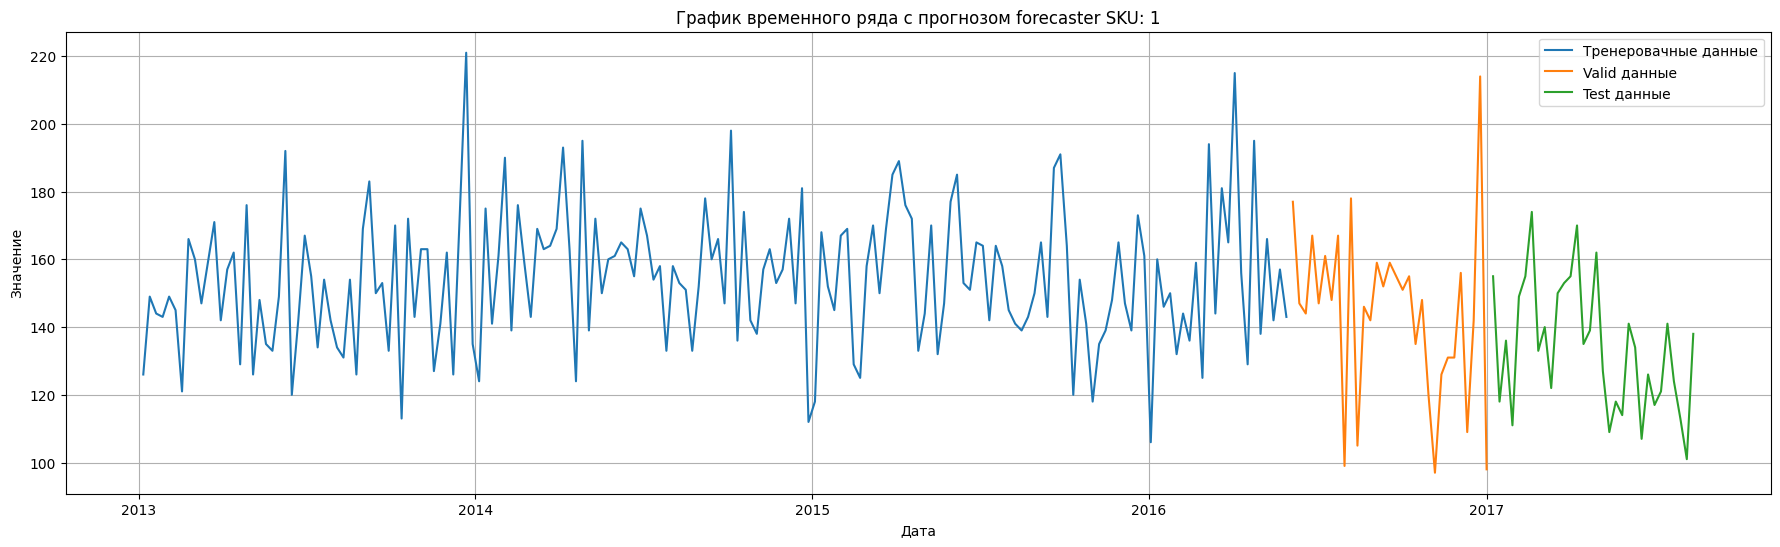

<ipython-input-51-a5a30764bc65>:81: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(data,regression = 'ct')


II По значению KPSS статистики, ряд НЕ стационарен метод KPSS

kpss_stat 0.368302824539519
p_value 0.01
lags 6
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
ndiffs нужно ли делать дифференцацию: 1
nsdiffs Сколько diff надо применить к данным: 0



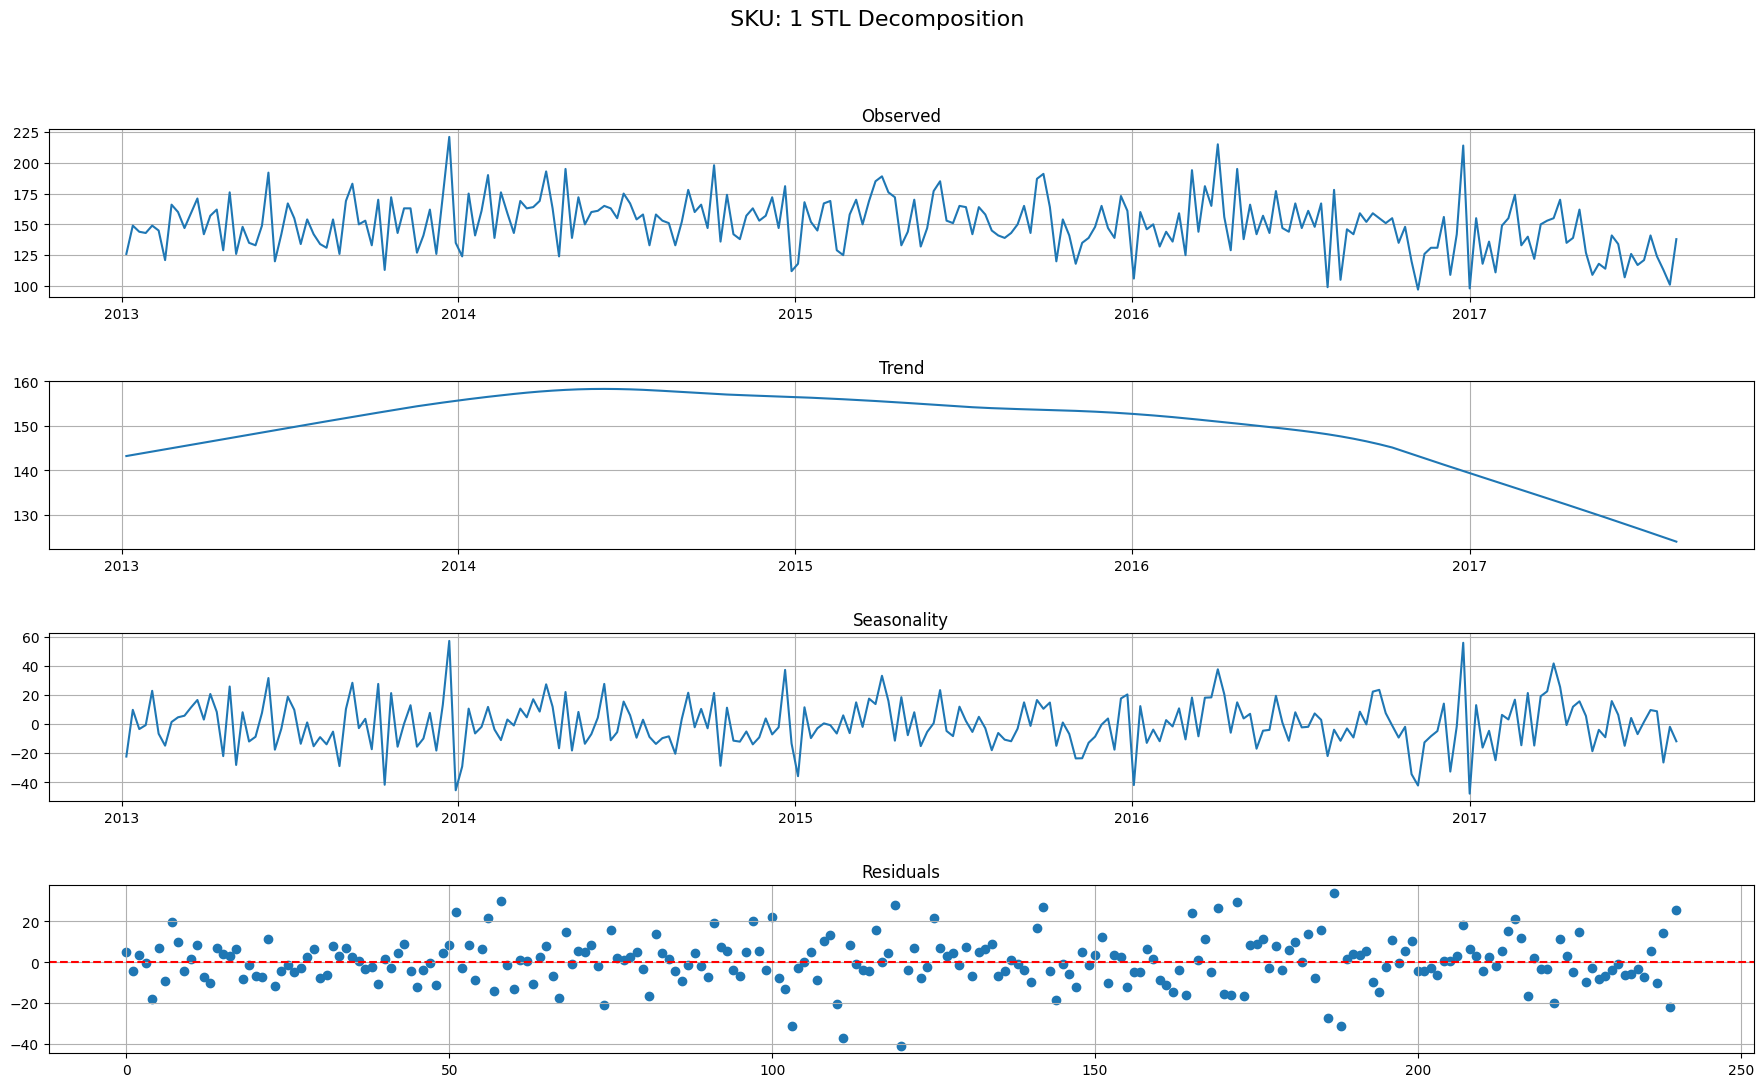

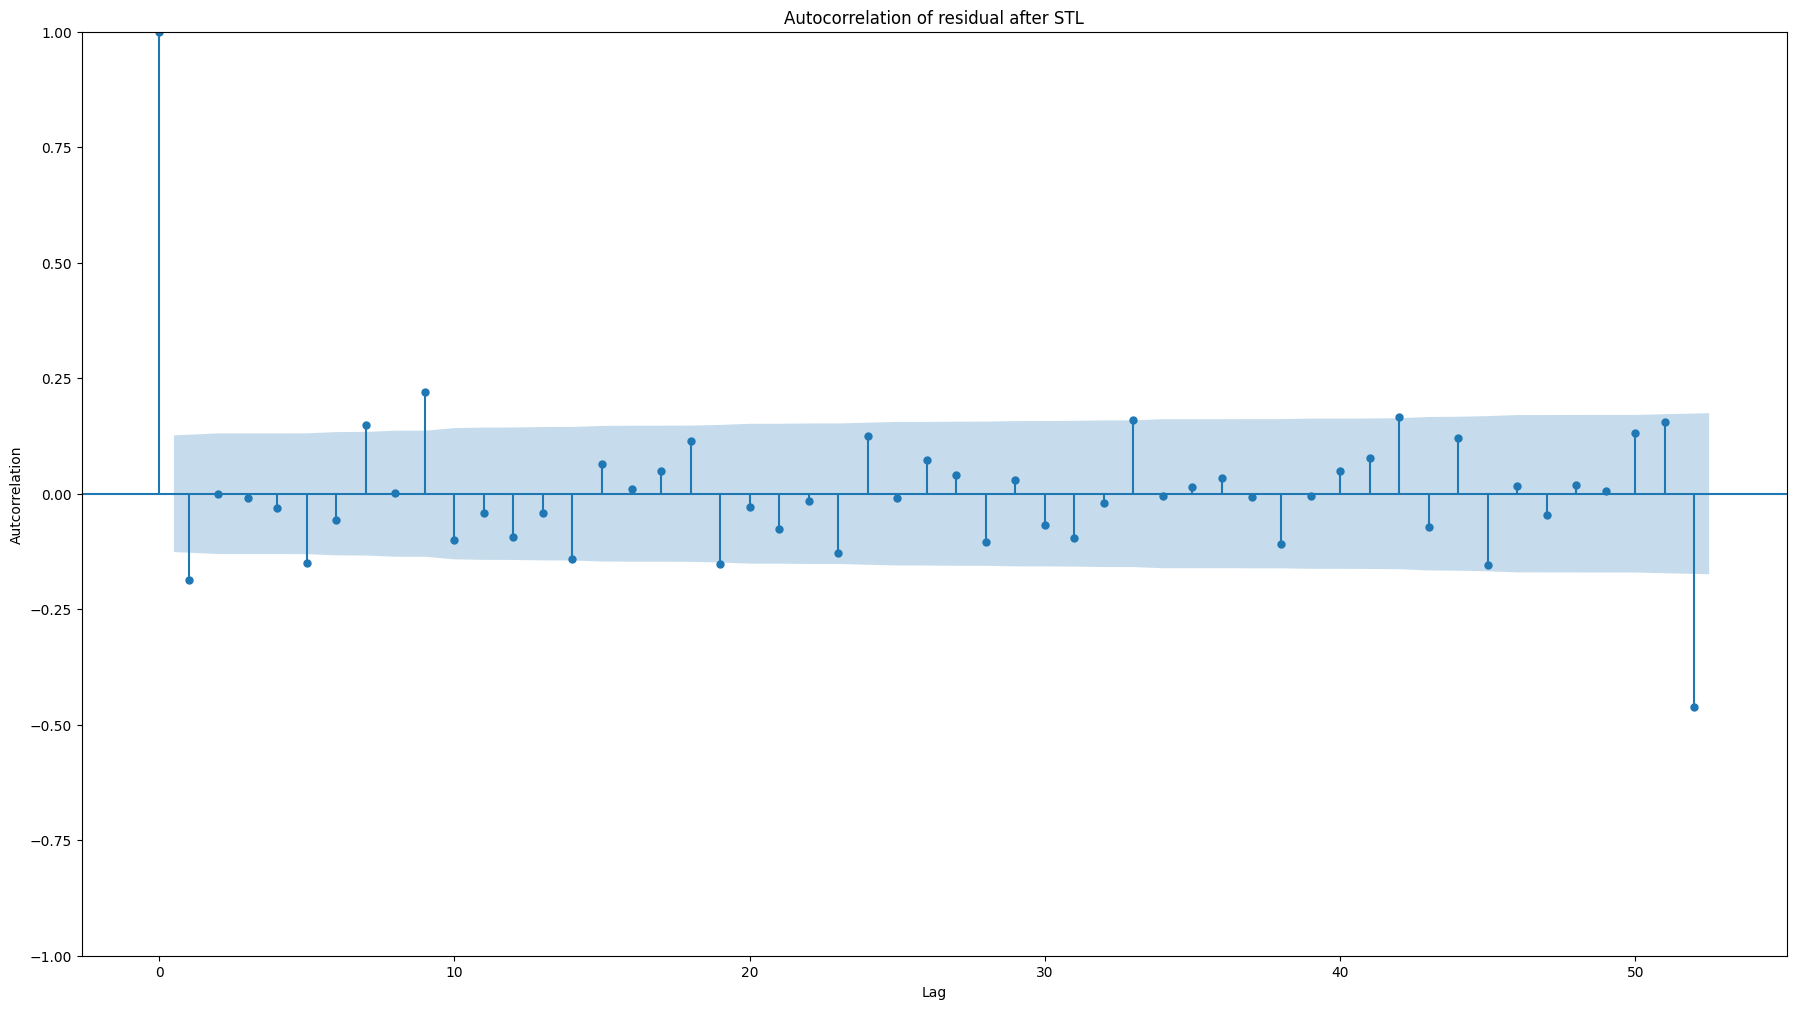

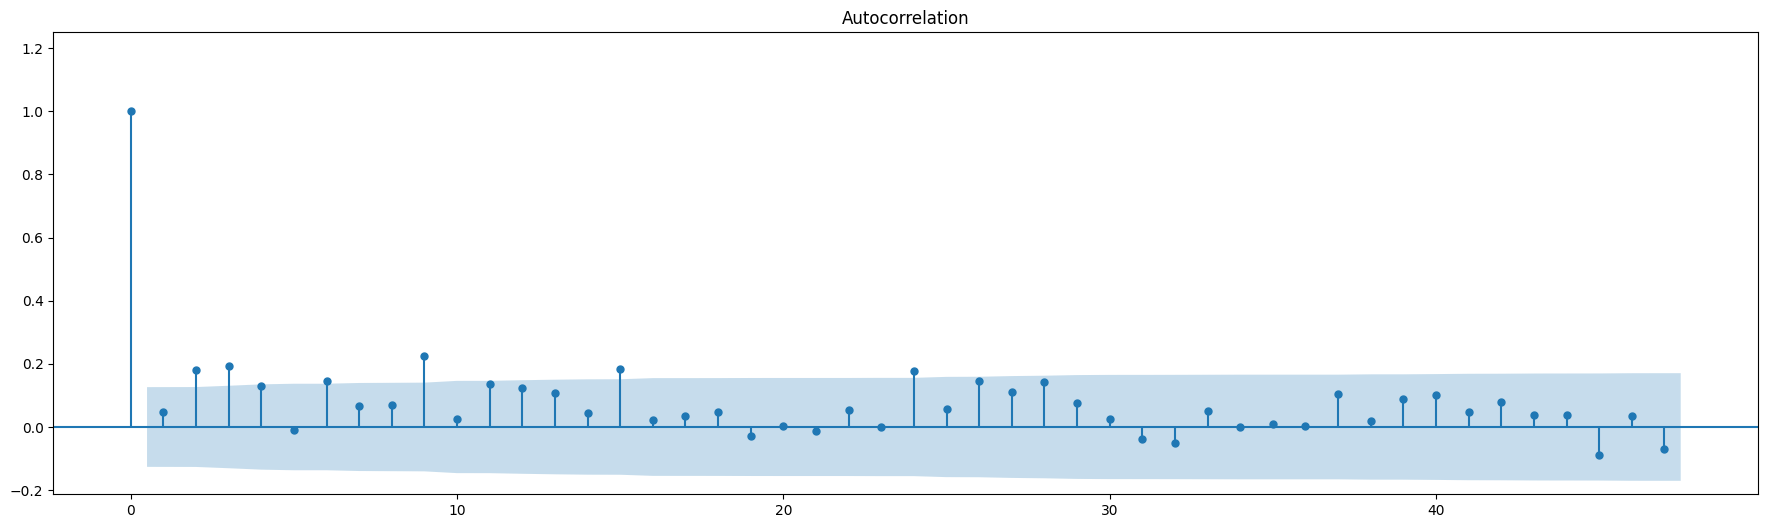

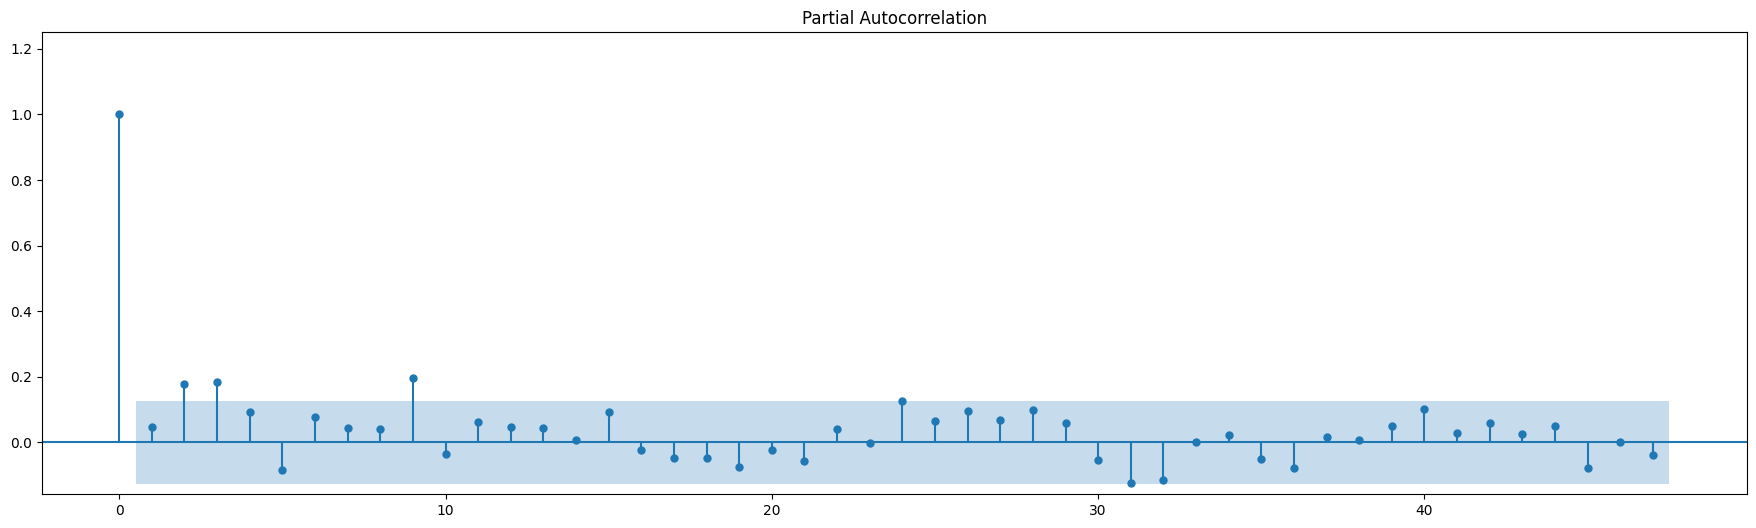

Train dates : 2013-01-06 00:00:00 --- 2016-05-29 00:00:00  (n=178)
Valid dates  : 2016-06-05 00:00:00 --- 2017-01-01 00:00:00  (n=31)
Test dates  : 2017-01-08 00:00:00 --- 2017-08-13 00:00:00  (n=32)
polynom_calendar_data (241, 406)
Оптимальное значение n_splits: 2
[-379.11594291082827, -422.24461560389, -394.2459464872131, -397.02900988061094]


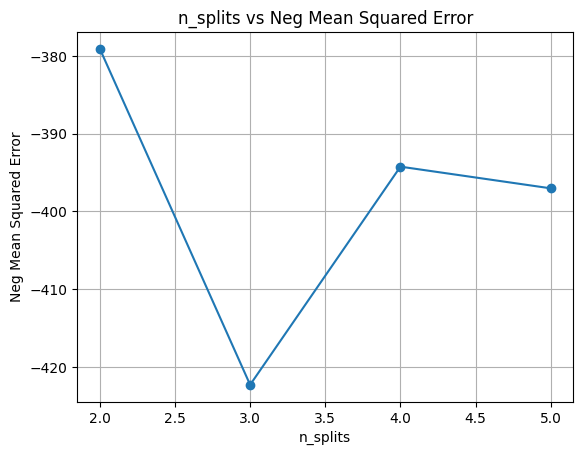

cccccccccccccccccc
Recursive feature elimination
-----------------------------
Total number of features available: 406
Total number of records available: 178
Total number of records used for feature selection: 178
Number of features selected: 7
Selected features : 
 ['num_iter' 'poly_month_sin__day_of_year_sin'
 'poly_month_cos__day_of_year_sin'
 'poly_week_of_year_cos__day_of_month_cos' 'poly_day_of_month__num_iter'
 'poly_day_of_month_sin__day_of_year_sin'
 'poly_day_of_month_cos__num_iter']
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
[-388.22306092 -396.81709425 -388.93906982 -401.05409275 -370.63448448
 -374.94161979 -340.01489788 -341.61960927 -349.62368433 -345.10262524
 -357.48525314 -357.63475604 -365.38702779 -361.03091924 -363.1014831
 -355.93466629 -357.62650219 -358.37521389 -358.47183548 -363.42798757]
Минимальная среднеквадратичная ошибка: -340.0148978756149


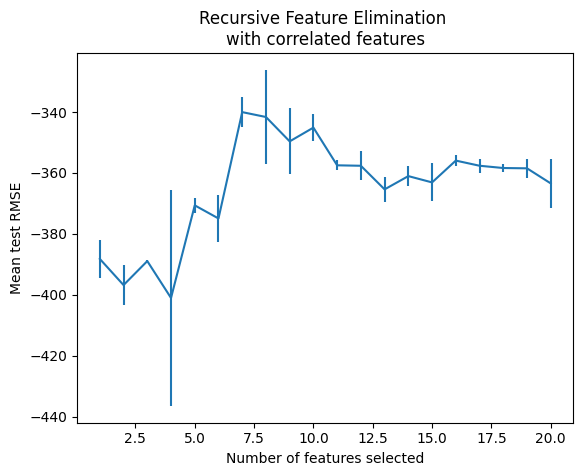

model bofore ================= 
ForecasterAutoreg 
Regressor: <catboost.core.CatBoostRegressor object at 0x7b9915ebdab0> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 
Transformer for y: None 
Transformer for exog: None 
Window size: 52 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'loss_function': 'RMSE', 'silent': True, 'random_state': 963} 
fit_kwargs: {} 
Creation date: 2024-03-11 10:28:56 
Last fit date: None 
Skforecast version: 0.11.0 
Python version: 3.10.12 
Forecaster id: None 

Number of models compared: 160,
         20 bayesian search in each lag configuration.
`Forecaster` refitted using the best-found lags and parameters, and the whole data 

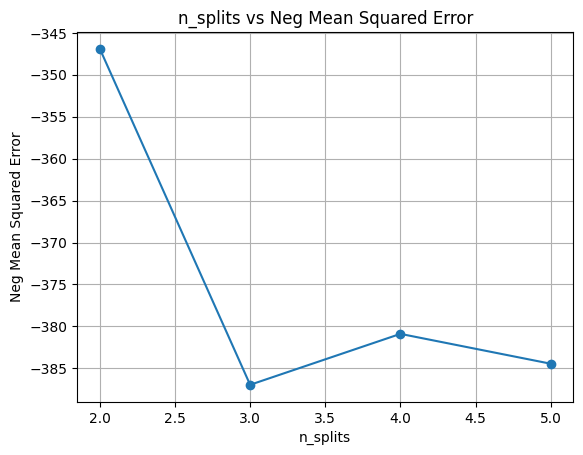

Recursive feature elimination
-----------------------------
Total number of features available: 581
Total number of records available: 178
Total number of records used for feature selection: 178
Number of features selected: 2
Selected features : 
 ['poly_week_of_year_cos__day_of_year_sin' 'lag_4_window_3_mean']
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
[-384.83128575 -382.54279491 -401.12543516 -441.37658589 -401.36839654
 -435.3780966  -436.60776287 -441.96746443 -432.05882994 -419.52261816
 -411.37018413 -404.40643003 -397.6858263  -404.18486628 -419.26618007
 -419.15926191 -405.49832302 -411.69473359 -411.77677373 -418.06626801]
Минимальная среднеквадратичная ошибка: -382.5427949136946


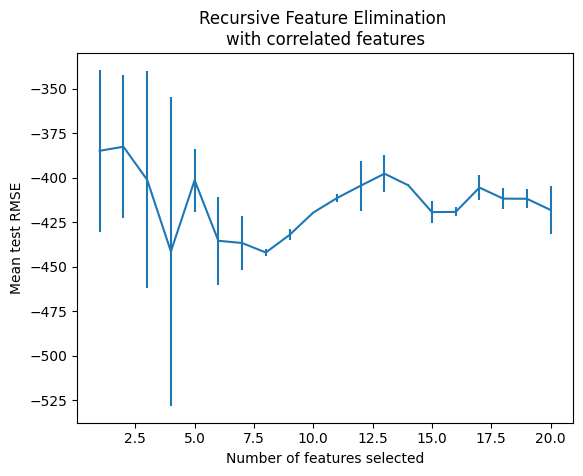

(241, 2)
selected_lags 1
selected_exog_features ['poly_week_of_year_cos__day_of_year_sin', 'lag_4_window_3_mean']
forecaster_52_best ================= 
ForecasterAutoreg 
Regressor: <catboost.core.CatBoostRegressor object at 0x7b990a7c0b80> 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'iterations': 100, 'learning_rate': 0.24190154855164397, 'depth': 9, 'loss_function': 'RMSE', 'silent': True, 'random_state': 963} 
fit_kwargs: {} 
Creation date: 2024-03-11 10:55:13 
Last fit date: None 
Skforecast version: 0.11.0 
Python version: 3.10.12 
Forecaster id: None 



/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:288: MissingValuesExogWarning: `exog` has missing values. Most machine learning models do not allow missing values. Fitting the forecaster may fail. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesExogWarning)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:288: MissingValuesExogWarning: `exog` has missing values. Most machine learning models do not allow missing values. Fitting the forecaster may fail. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesExogWarning)
  warnings.warn(


fffff
importance                                   feature  importance
1  poly_week_of_year_cos__day_of_year_sin   36.952937
2                     lag_4_window_3_mean   33.686396
0                                   lag_1   29.360667
eeeeeeeeeeeee
2016-06-05    154.509957
2016-06-12    142.134037
2016-06-19    159.133480
2016-06-26    155.377560
2016-07-03    131.830102
                 ...    
2017-07-16    148.194020
2017-07-23    141.837758
2017-07-30    152.272138
2017-08-06    130.360226
2017-08-13    151.083053
Freq: W-SUN, Name: pred, Length: 63, dtype: float64


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:660: MissingValuesExogWarning: `exog` has missing values. Most of machine learning models do not allow missing values. `predict` method may fail. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesExogWarning)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:288: MissingValuesExogWarning: `exog` has missing values. Most machine learning models do not allow missing values. Fitting the forecaster may fail. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesExogWarning)
  warnings.warn(


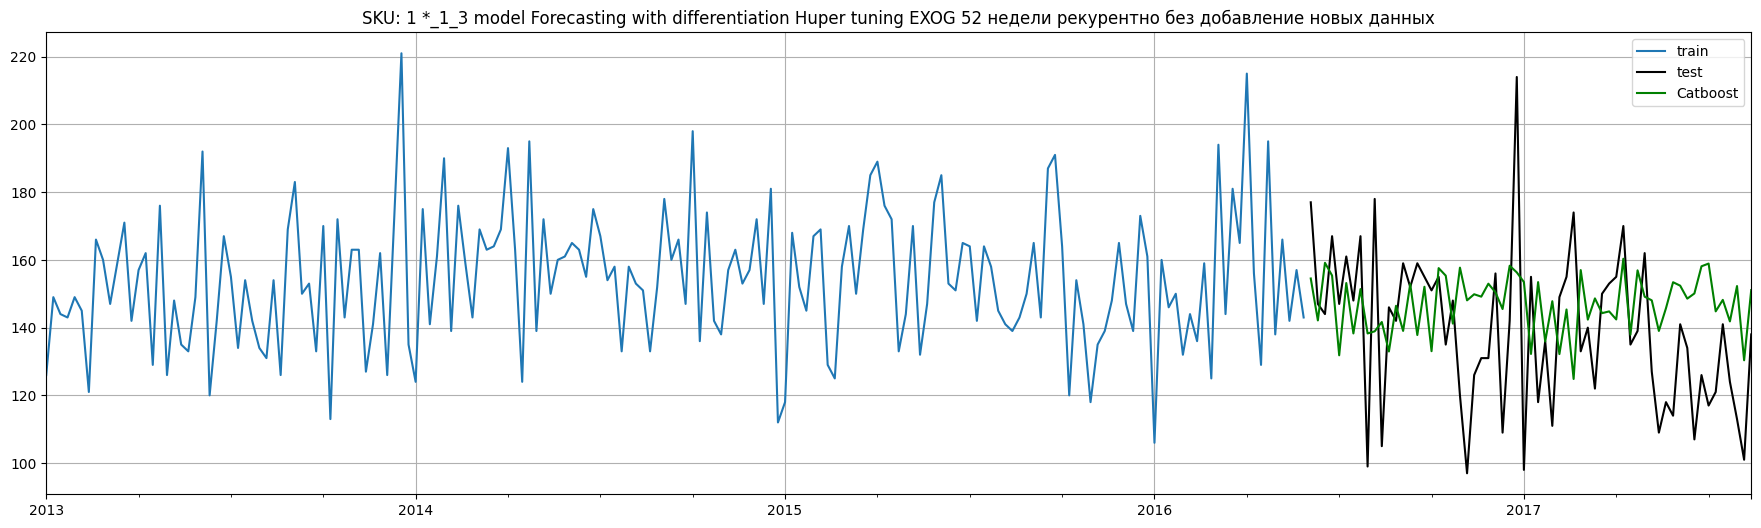

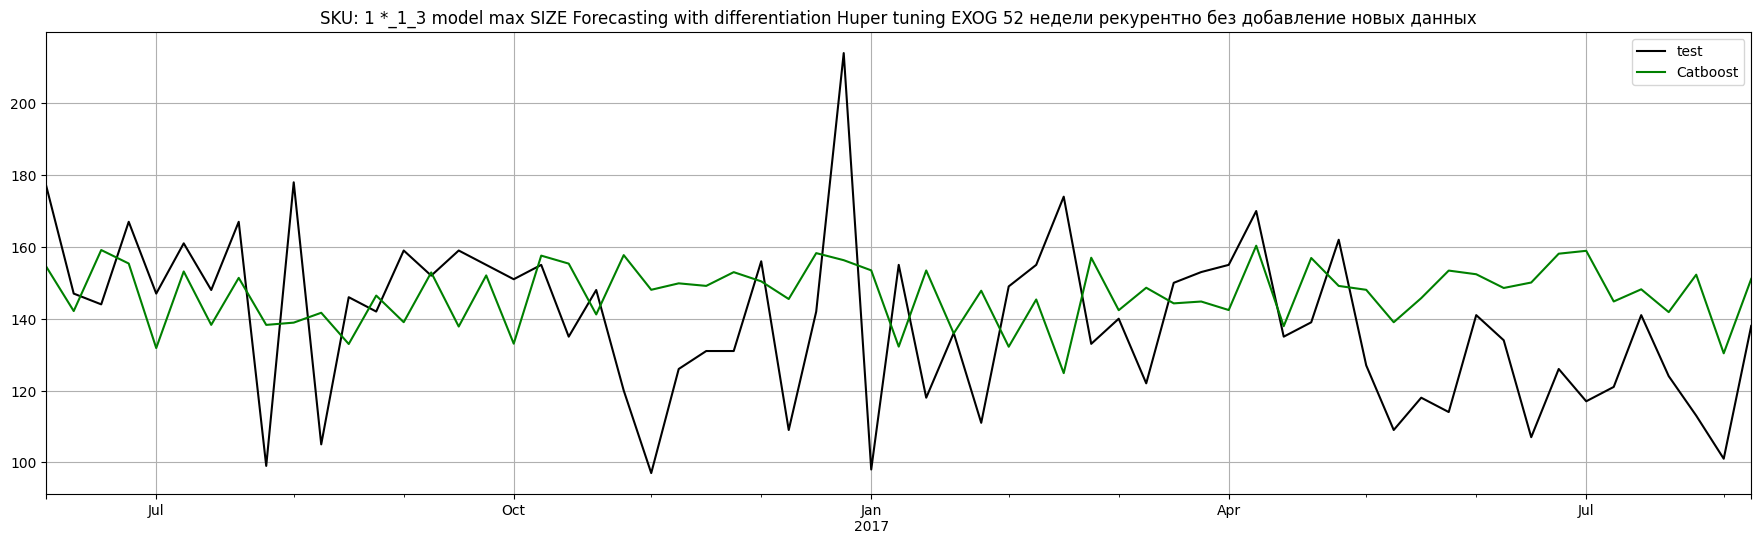


666666666 2016-06-05    154.509957
2016-06-12    142.134037
2016-06-19    159.133480
2016-06-26    155.377560
2016-07-03    131.830102
                 ...    
2017-07-16    148.194020
2017-07-23    141.837758
2017-07-30    152.272138
2017-08-06    130.360226
2017-08-13    151.083053
Freq: W-SUN, Name: pred, Length: 63, dtype: float64
7777777 date
2016-06-05    177.0
2016-06-12    147.0
2016-06-19    144.0
2016-06-26    167.0
2016-07-03    147.0
              ...  
2017-07-16    141.0
2017-07-23    124.0
2017-07-30    113.0
2017-08-06    101.0
2017-08-13    138.0
Freq: W-SUN, Name: unit_sales, Length: 63, dtype: float64


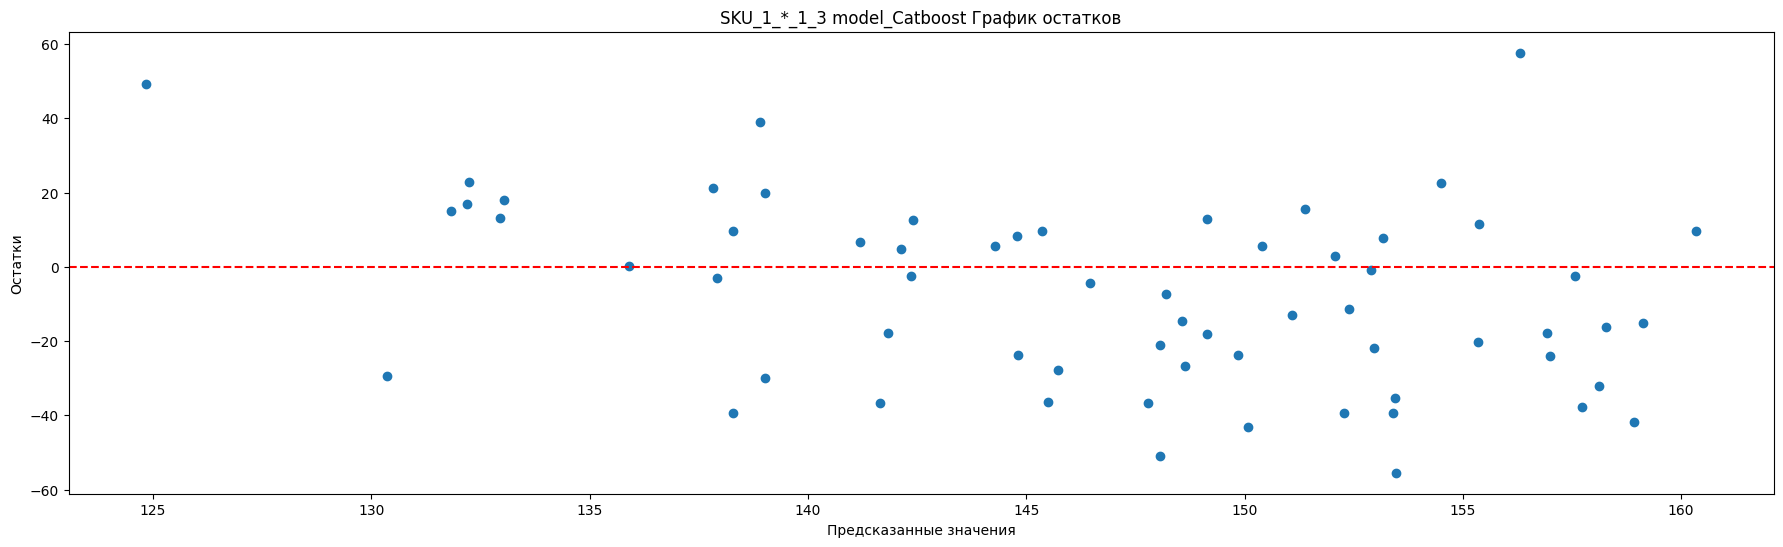

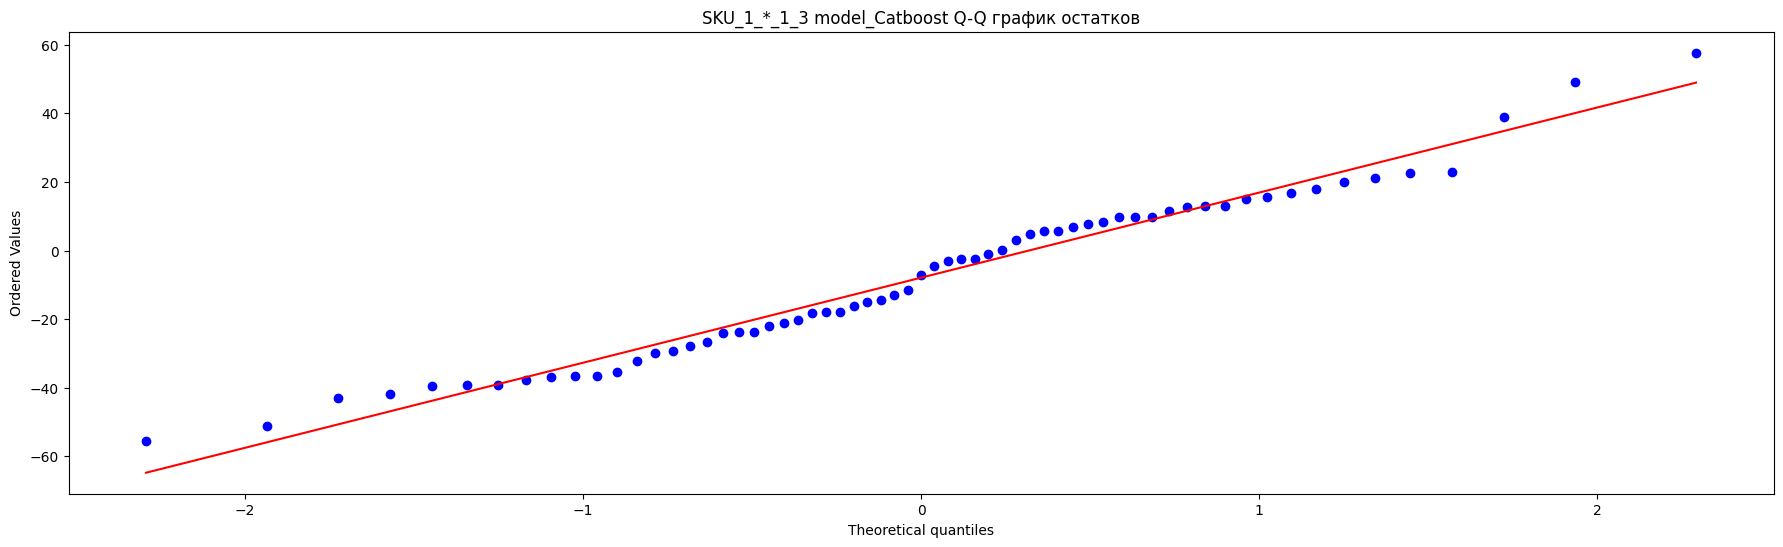

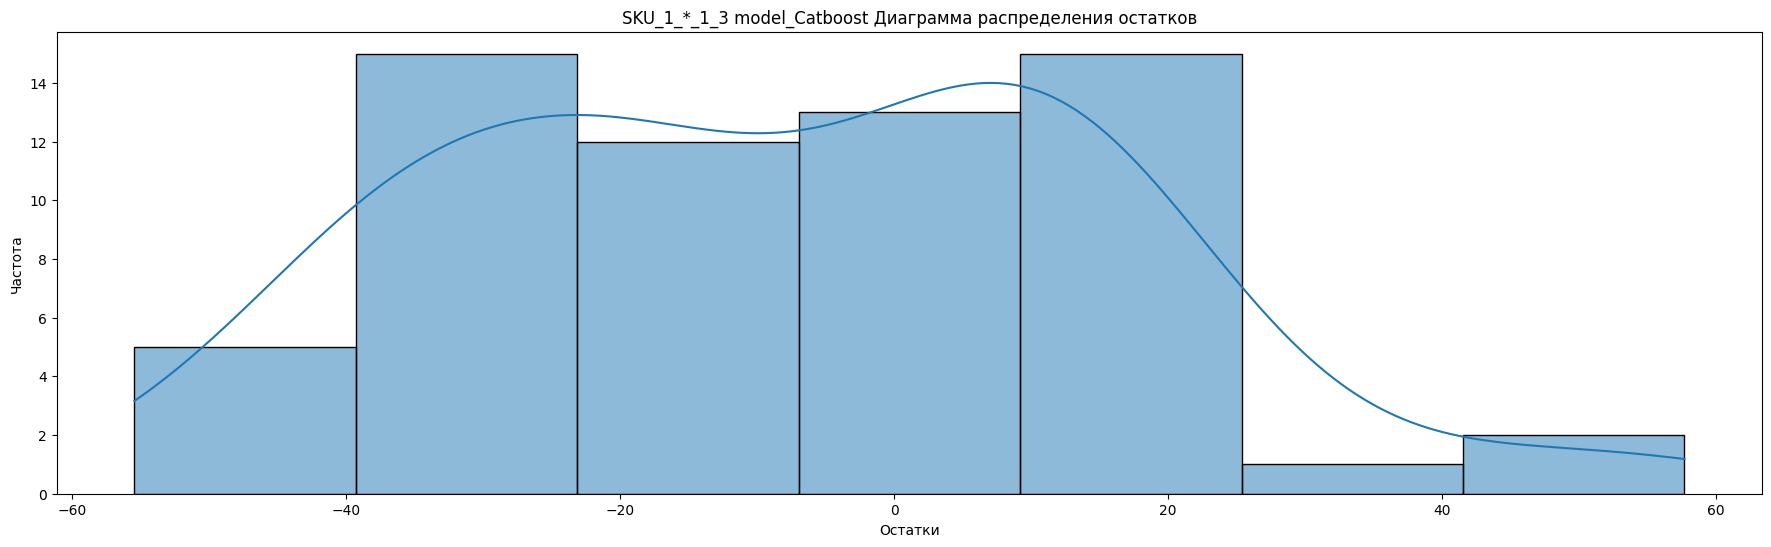

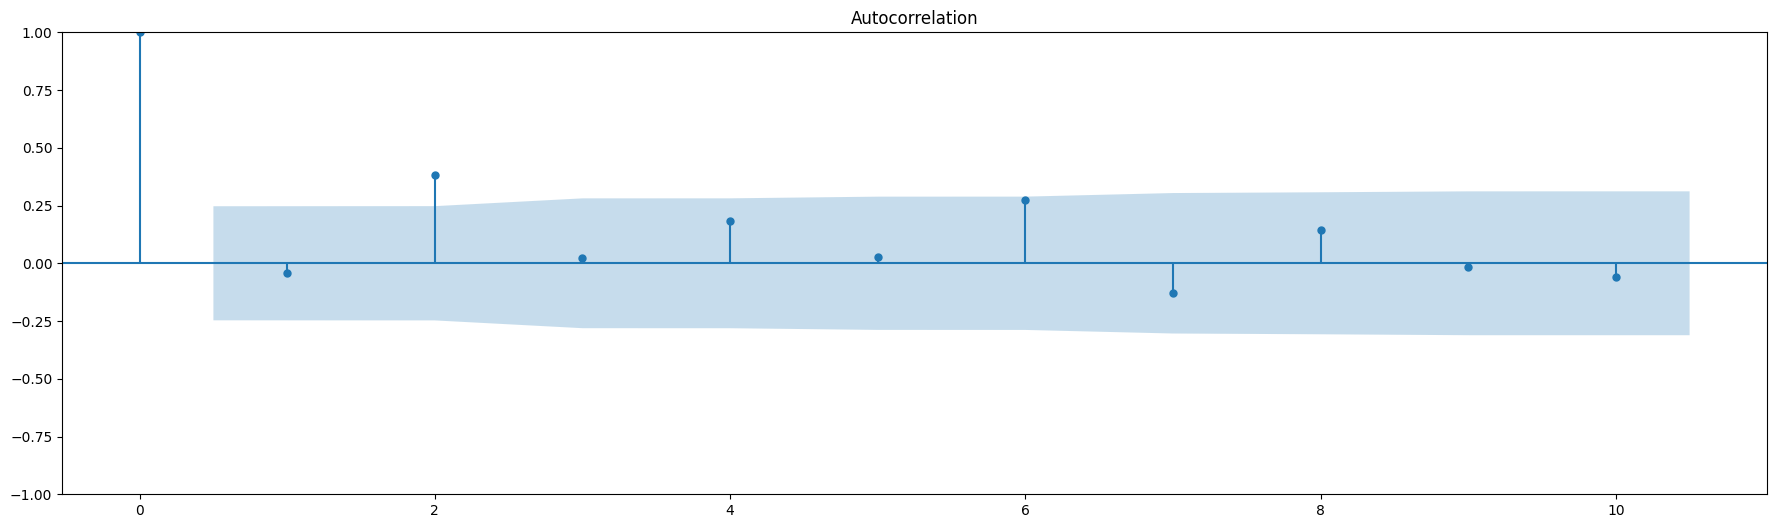

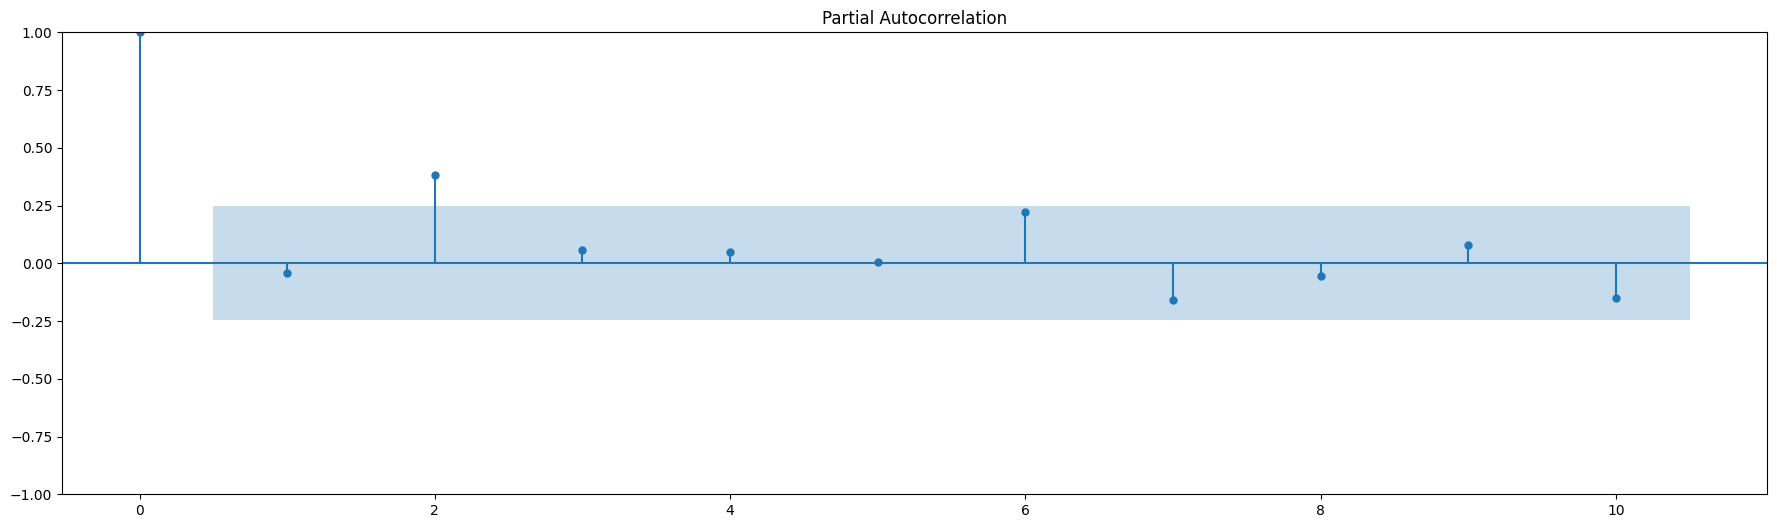


Статисткика по остаткам SKU_1_*_1_3 model_Catboost
Остатки временного ряда распределены согласно нормальному закону
Статистика теста Шапиро-Уилка : 0.9732373952865601
p-value Шапиро-Уилка : 0.18543066084384918

Тест Бокса-Пирса (BP) и Льюнга-Бокса (LB) на определение шума в остатках
      lb_stat  lb_pvalue    bp_stat  bp_pvalue        result
1    0.110819   0.739214   0.105704   0.745089     белый шум
2    9.914514   0.007032   9.306095   0.009533  не белый шум
3    9.956499   0.018940   9.344850   0.025040  не белый шум
4   12.302559   0.015238  11.474351   0.021720  не белый шум
5   12.349911   0.030295  11.516603   0.042047  не белый шум
6   17.754600   0.006876  16.256100   0.012443  не белый шум
7   18.981016   0.008247  17.312705   0.015487  не белый шум
8   20.495618   0.008615  18.594291   0.017187  не белый шум
9   20.520329   0.014959  18.614820   0.028675  не белый шум
10  20.788104   0.022621  18.833159   0.042434  не белый шум

Тест Дарбина-Уотсона: 1.8603033922684218
От

<ipython-input-7-0378c106cb67>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(residuals,regression = 'ct')


In [ ]:
for sku in range(1,2):
    even_df = filtered_grouped_data[filtered_grouped_data['store_nbr']==sku][['date','unit_sales']]
    even_df['date'] = pd.to_datetime(even_df['date'])
    even_df = even_df.set_index('date')
    even_df = even_df.asfreq('D')
    weekly_df = even_df.resample('W').sum()


    func_model(weekly_df[:-1],sku)
    # static_stacionar(weekly_df[:-1], sku)

In [ ]:
res_df.head(10)

In [ ]:
X_filtered_g_1

In [ ]:
X_filtered_g_1.columns.tolist()

In [ ]:
[i for i in X_filtered_g_1.columns.tolist() if 'sum_values' in i]

In [ ]:
X_filtered_g_1.loc['2013-03-31','lag_4__sum_values']
# 2013-03-31  171.0  159.0  147.0  160.0

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from catboost import CatBoostRegressor
import numpy as np

# Генерация синтетических данных
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14]])
y = np.array([1, 2, 3, 4, 5, 6, 7])

# Создание модели
model = CatBoostRegressor(verbose=False)

# Значения n_splits для проверки
n_splits_values = [2, 3, 4, 5,6]

# Словарь для сохранения среднего значения оценок
mean_scores = {}
mean_scores_1 = []

# Проход по всем значениям n_splits
for n_splits in n_splits_values:
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')#'neg_mean_squared_error' 'r2'
    mean_scores[n_splits] = np.mean(scores)
    mean_scores_1.append(np.mean(scores))

# Нахождение оптимального значения n_splits
best_n_splits = max(mean_scores, key=mean_scores.get)
print(f'Оптимальное значение n_splits: {best_n_splits}')
print(mean_scores_1)
# Построение графика
plt.plot(n_splits_values, mean_scores_1, marker='o')
plt.xlabel('n_splits')
plt.ylabel('Neg Mean Squared Error')
plt.title('n_splits vs Neg Mean Squared Error')
plt.grid(True)
plt.show()